In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('~/downloads/car_prices.csv')

In [3]:
# Top 5 Rows of the data 
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
# Checking the shape of the data 
data.shape

(558837, 16)

In [5]:
# Checking the Null value of the data
data.isnull().sum() / data.shape[0]

year            0.000000
make            0.018433
model           0.018608
trim            0.019059
body            0.023612
transmission    0.116943
vin             0.000007
state           0.000000
condition       0.021151
odometer        0.000168
color           0.001340
interior        0.001340
seller          0.000000
mmr             0.000068
sellingprice    0.000021
saledate        0.000021
dtype: float64

In [6]:
# Data Description
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
# Checkig the datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
# Changing the data type to datetime64 with 'ns' unit
data['year'] = data['year'].astype('datetime64[ns]')


# Univariate Analysis

In [9]:
num_cols=data.select_dtypes(include=np.number).columns

In [10]:
num_cols

Index(['condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

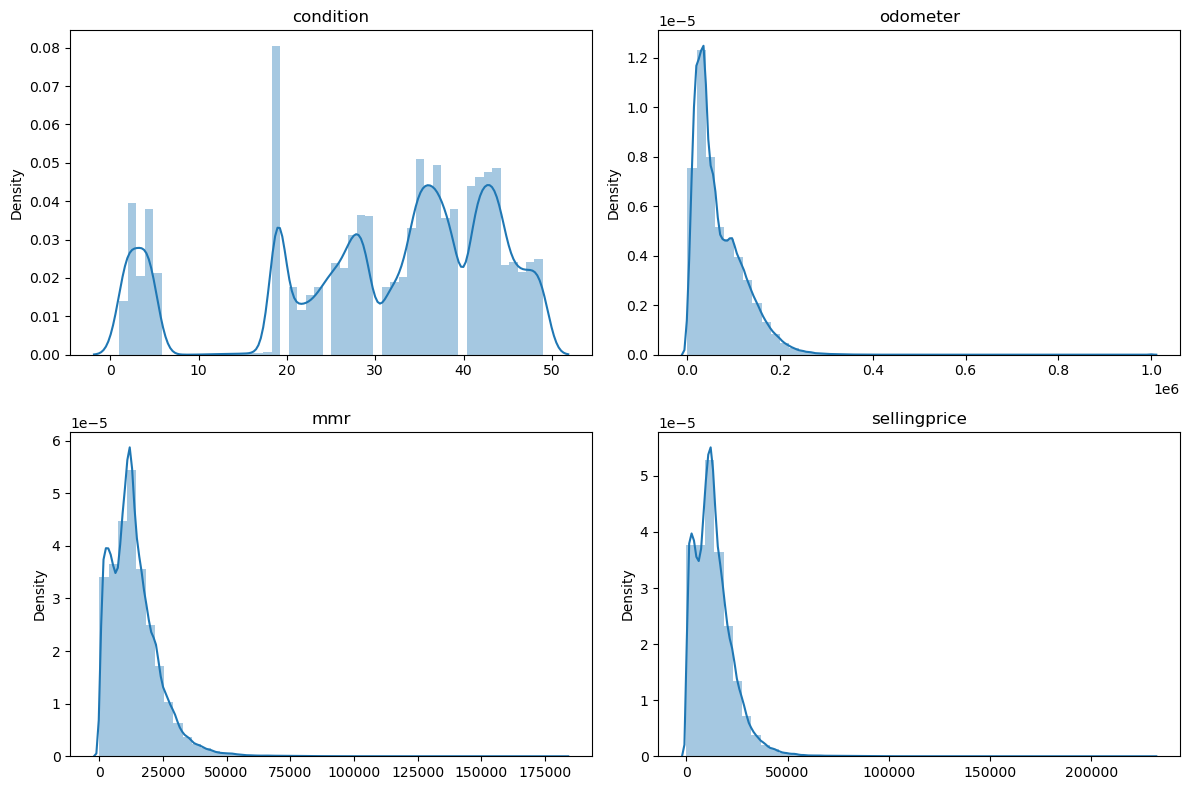

In [11]:
plt.rcParams['figure.figsize']=(12,8)
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(x=data[i].dropna())
    t=t+1
    plt.title(i)
plt.tight_layout()    

In [12]:
# Checking the Skewness of the data
data[num_cols].skew()

condition      -0.832956
odometer        1.843200
mmr             1.997644
sellingprice    1.953444
dtype: float64

In [13]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,1970-01-01 00:00:00.000002015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1970-01-01 00:00:00.000002015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,1970-01-01 00:00:00.000002014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,1970-01-01 00:00:00.000002015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,1970-01-01 00:00:00.000002014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


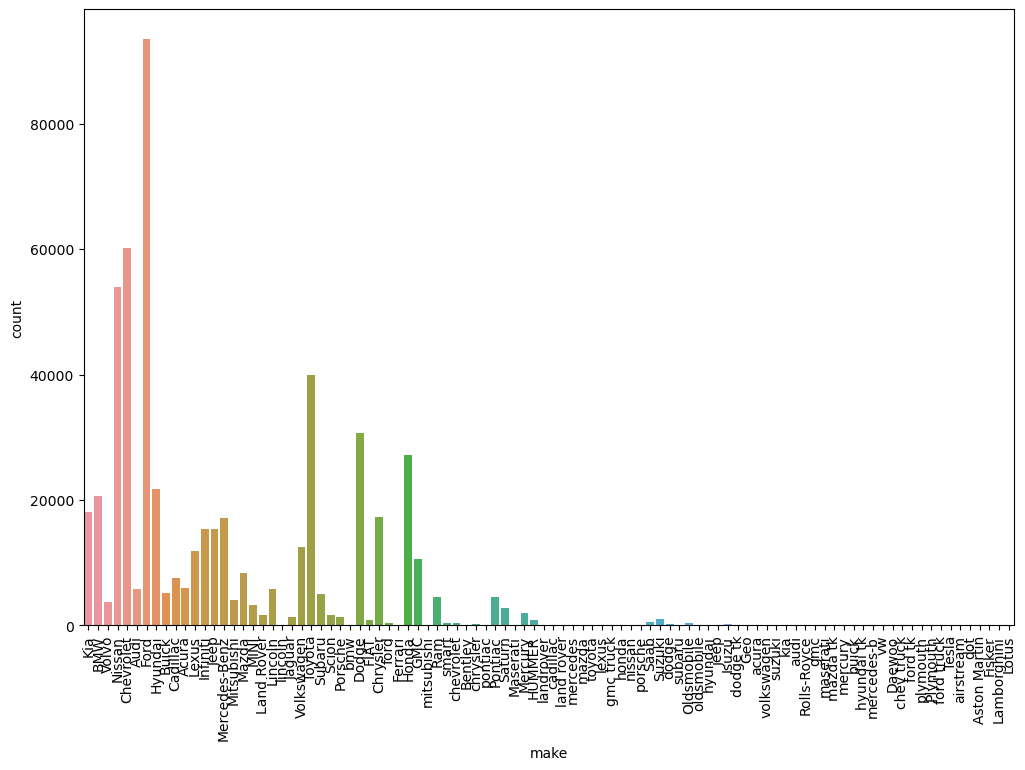

In [14]:
sns.countplot(x=data['make'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='transmission', ylabel='count'>

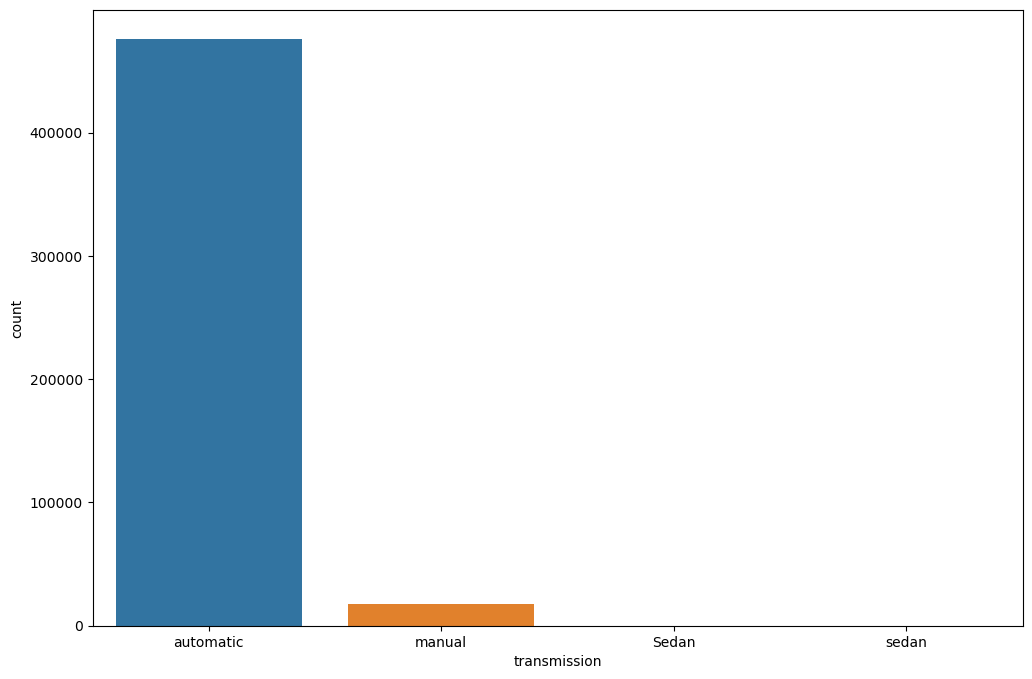

In [15]:
sns.countplot(x=data['transmission'])

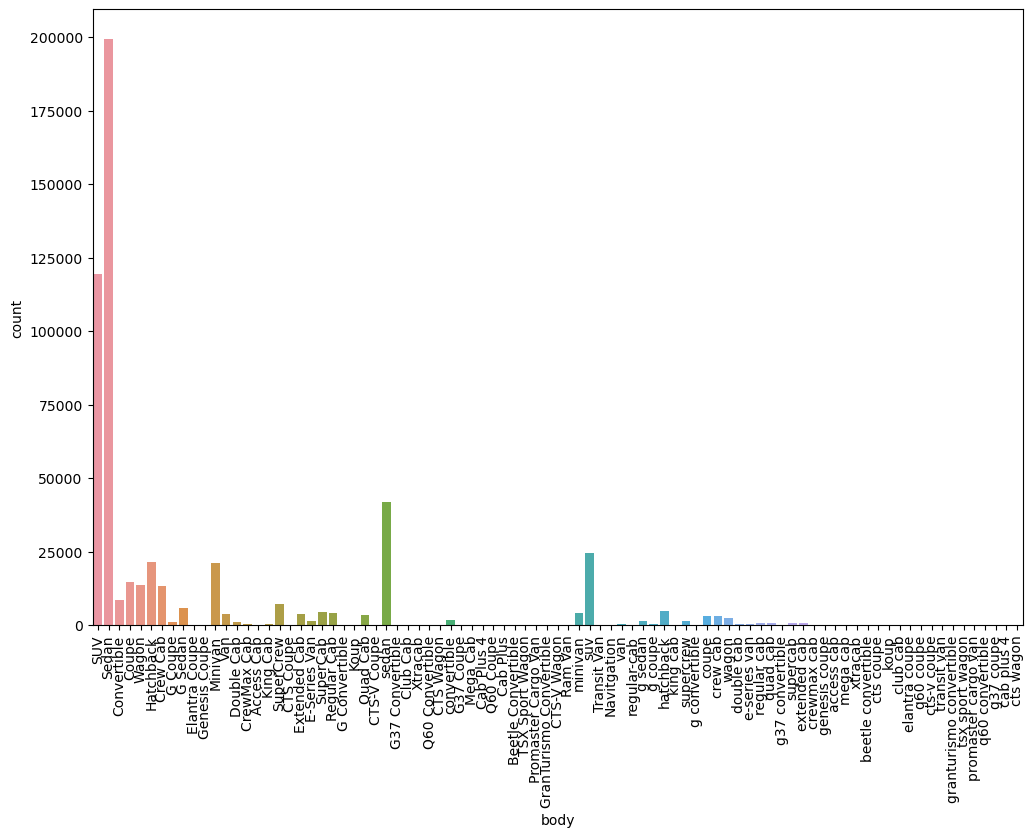

In [16]:
sns.countplot(x=data['body'])
plt.xticks(rotation=90)
plt.show()

In [17]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [18]:
# Removing the unwanted columns
data.drop('vin',axis=1,inplace =True)

In [19]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,1970-01-01 00:00:00.000002015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1970-01-01 00:00:00.000002015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,1970-01-01 00:00:00.000002014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,1970-01-01 00:00:00.000002015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,1970-01-01 00:00:00.000002014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [20]:
import pandas as pd

# Assuming 'saledate' is the name of the column containing the date strings
data['year'] = pd.to_datetime(data['year'], utc=True)

# Extract the year from the 'saledate' column and store it in a new column 'saleyear'
data['year'] = data['year'].dt.year


In [21]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,1970,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,1970,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,1970,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [22]:
data.drop('saledate',axis=1,inplace=True)

In [23]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,1970,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,1970,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,1970,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


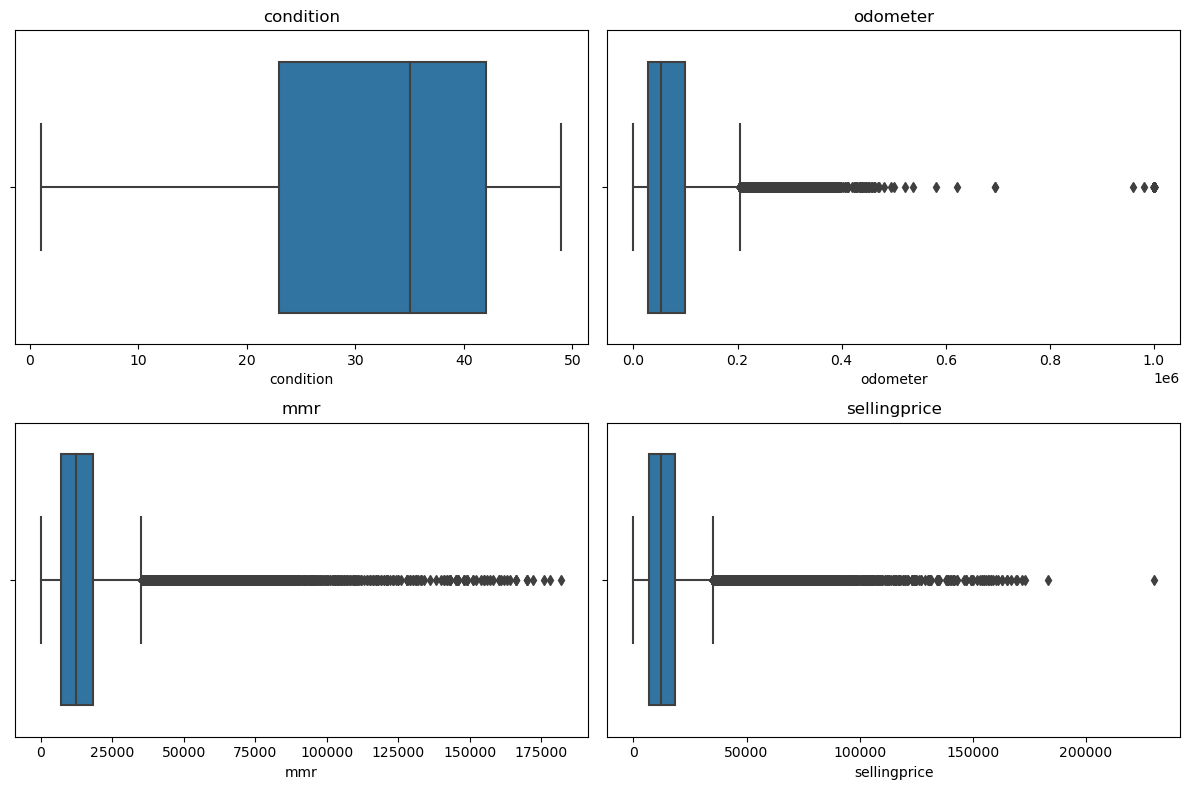

In [24]:
# Checking the Outliers in the data
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i])
    plt.title(i)
    t=t+1
plt.tight_layout()    
plt.show()



# Bivariate Analysis

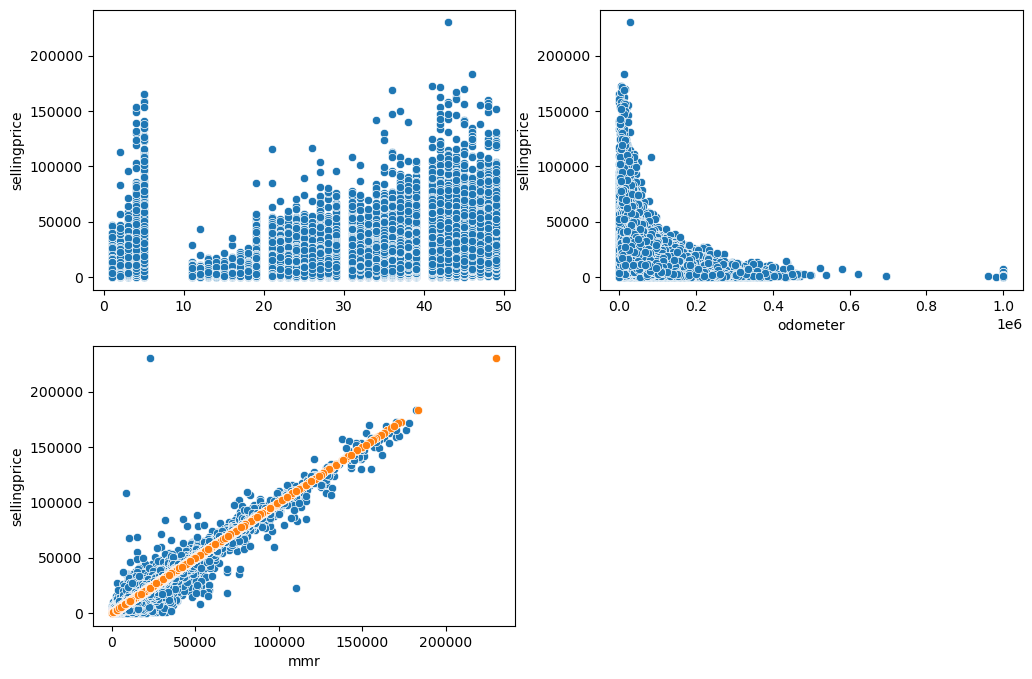

In [25]:
t=1 
for i in num_cols:
    if i!='sellingprice':
        plt.subplot(2,2,t)
    
    sns.scatterplot(x=data[i],y=data['sellingprice'])
    t=t+1  

In [26]:
cat_cols=data.select_dtypes(include=object).columns
cat_cols

Index(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color',
       'interior', 'seller'],
      dtype='object')

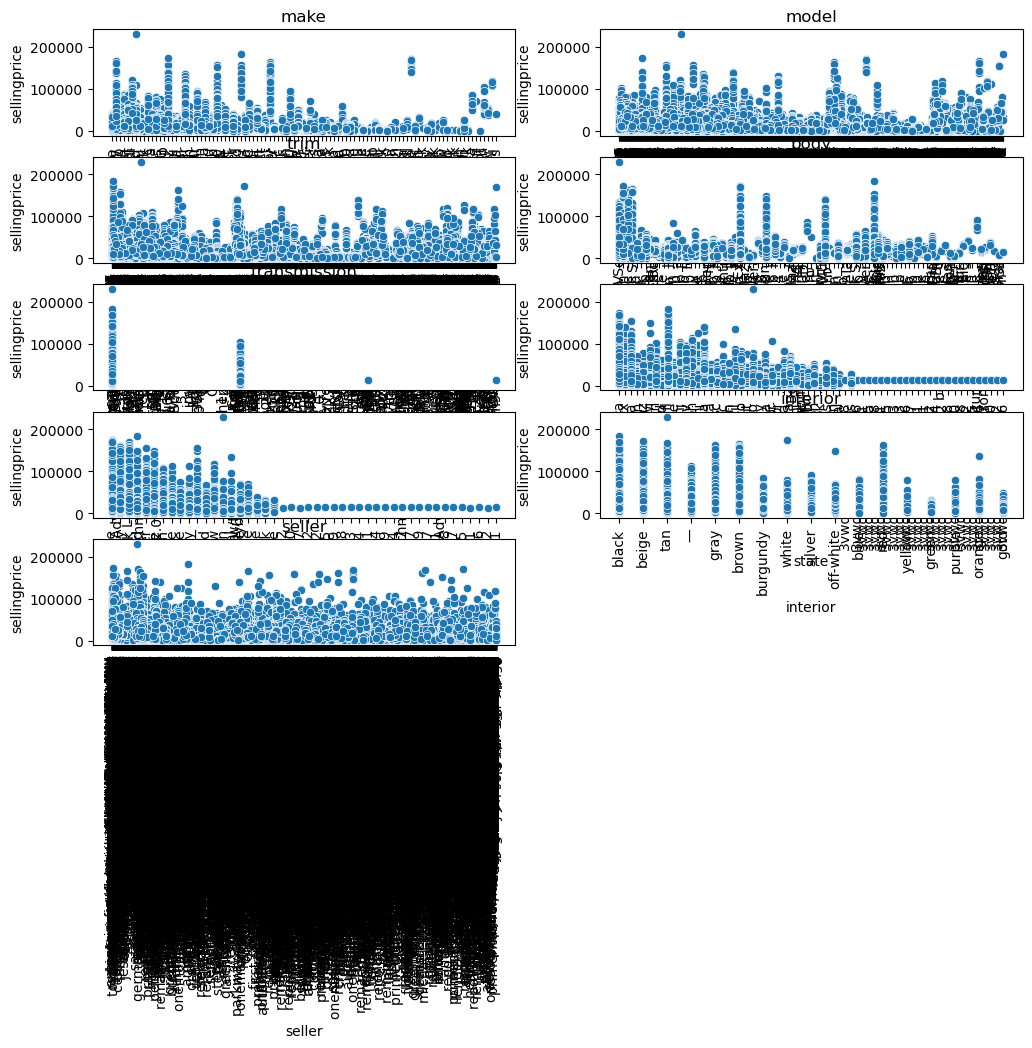

In [27]:
t=1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.scatterplot(x=data[i],y=data['sellingprice'])
    plt.title(i)
    t=t+1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,1970,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,1970,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,1970,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,1970,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


# Feature Engineering

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 59.7+ MB


In [30]:
null_counts = data.isnull().sum()
null_percentage = null_counts / len(data)
null_percentage

year            0.000000
make            0.018433
model           0.018608
trim            0.019059
body            0.023612
transmission    0.116943
state           0.000000
condition       0.021151
odometer        0.000168
color           0.001340
interior        0.001340
seller          0.000000
mmr             0.000068
sellingprice    0.000021
dtype: float64

In [31]:
# Drop rows containing null values
data.dropna(inplace=True)


In [32]:
data.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [33]:
data.dropna(inplace=True)

In [34]:
data.shape

(472325, 14)

In [35]:
# Check if a column is categorical and get its name
cat_cols = [col for col in data.columns if data[col].dtype == 'object']


In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize OneHotEncoder
le=LabelEncoder()

for i in cat_cols:
    data[i]=le.fit_transform(data[i])

In [37]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,1970,24,637,818,35,0,2,5.0,16639.0,17,1,5943,20500.0,21500.0
1,1970,24,637,818,35,0,2,5.0,9393.0,17,0,5943,20800.0,21500.0
2,1970,3,8,253,36,0,2,45.0,1331.0,7,1,4090,31900.0,30000.0
3,1970,51,575,1212,36,0,2,41.0,14282.0,17,1,11541,27500.0,27750.0
4,1970,3,33,335,36,0,2,43.0,2641.0,7,1,4090,66000.0,67000.0


In [38]:
data.shape

(472325, 14)

In [39]:
data.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [40]:
data.drop('year',axis=1,inplace=True)

In [41]:
x = data.drop('sellingprice', axis=1)
y = data['sellingprice']


In [43]:
# Train Test Split the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [46]:
y_pred=model.predict(xtest)
y_pred

array([ 4474.29997095, 20727.28974628, 22909.55359733, ...,
        4951.79479439,  5364.28301796,  8593.04957181])

In [47]:
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2693649.712177314


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(ytest, y_pred)
print("R-squared (R2 score):", r2)

R-squared (R2 score): 0.9707112640673555


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5, scoring='r2')

In [54]:
print(scores)

[0.96849714 0.96989671 0.97343294 0.95709122 0.9769446 ]


In [55]:
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.969172523302821


In [60]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score





# Step 4: Initialize the Random Forest classifier
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Train the classifier on the training data
rf_classifier.fit(xtrain, ytrain)

# Step 6: Make predictions on the testing data
y_pred = rf_classifier.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2405592.7322003487


In [61]:
r2 = r2_score(ytest, y_pred)
print("R-squared (R2 score):", r2)

R-squared (R2 score): 0.9738433806087008


In [62]:
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.969172523302821
